In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('cleaned_dataset.csv')

texts = df['processed_text']
labels = df['sentiment_label'] 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels)

In [12]:
# After splitting
X_train = X_train.fillna('')  
X_test = X_test.fillna('')   

In [13]:
# TF-IDF vectorization

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
#Train Logistic Regression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
# Evaluation

y_pred = lr_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8375
Precision: 0.838995366478954
Recall: 0.8375
F1-score: 0.8327894632822961

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.62      0.72      1650
     neutral       0.82      0.95      0.88      2556
    positive       0.86      0.86      0.86      3154

    accuracy                           0.84      7360
   macro avg       0.84      0.81      0.82      7360
weighted avg       0.84      0.84      0.83      7360



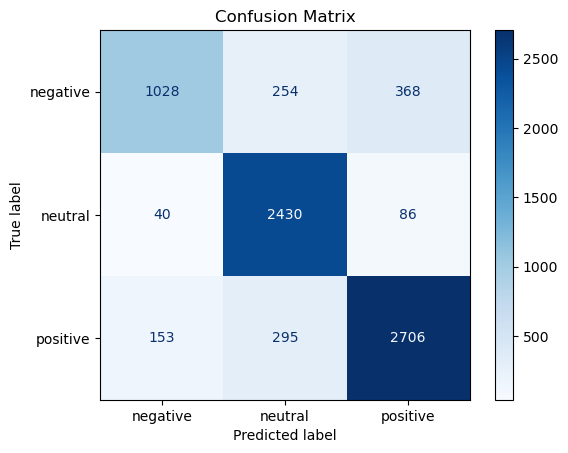

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [18]:
lr_df = pd.DataFrame({
    'processed_text': X_test,
    'sentiment_label': y_test,
    'lr_pred': y_pred
})

lr_df.to_csv('lr_predictions.csv', index=False)